bout DATA:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Columns

1.Pregnancies = Number of times pregnant

2.Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3.BloodPressure = Diastolic blood pressure (mm Hg)

4.SkinThickness = Triceps skin fold thickness (mm)

5.Insulin = 2-Hour serum insulin (mu U/ml)

6.BMI = Body mass index (weight in kg/(height in m)^2)

7.DiabetesPedigreeFunction = Diabetes pedigree function

8.Age = Age (years)

9.Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [27]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(23,8)})
import warnings
warnings.filterwarnings('ignore')

In [28]:
# read in the dataset
df=pd.read_csv('pima-data.csv')
df.shape

(768, 10)

In [29]:
# check the head of the dataset and columns
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [30]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [31]:
#check the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.8 KB


In [32]:
#describe the columns
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


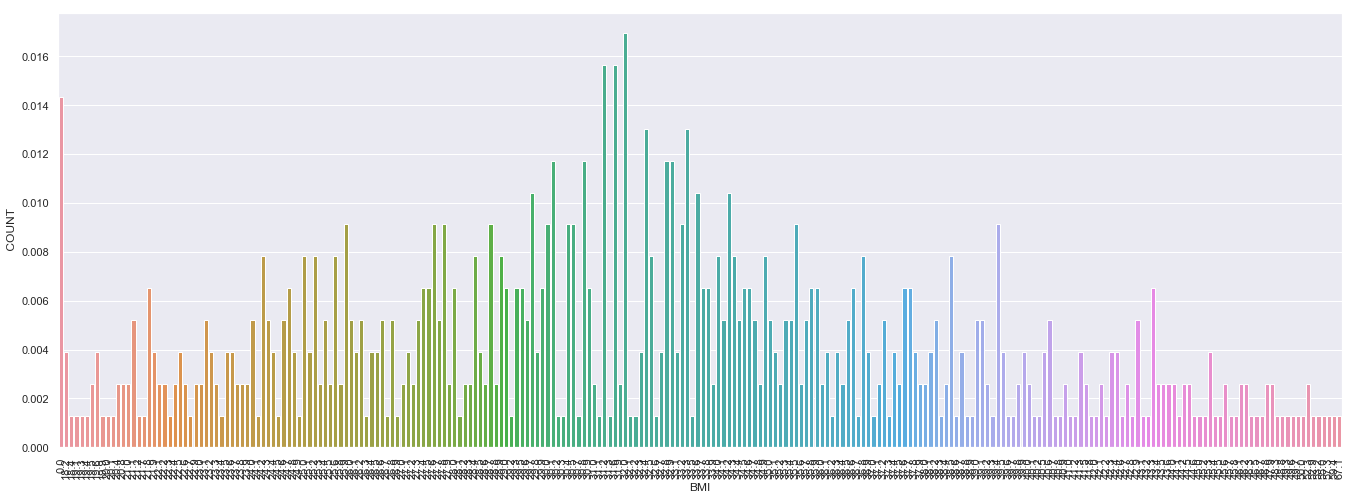

In [33]:
#check out the distribution of BMI
sns.barplot(x= df.bmi.value_counts(10).index, y = df.bmi.value_counts(10).values)
plt.xlabel('BMI')
plt.ylabel(" COUNT")
plt.xticks(rotation=90)
plt.show()

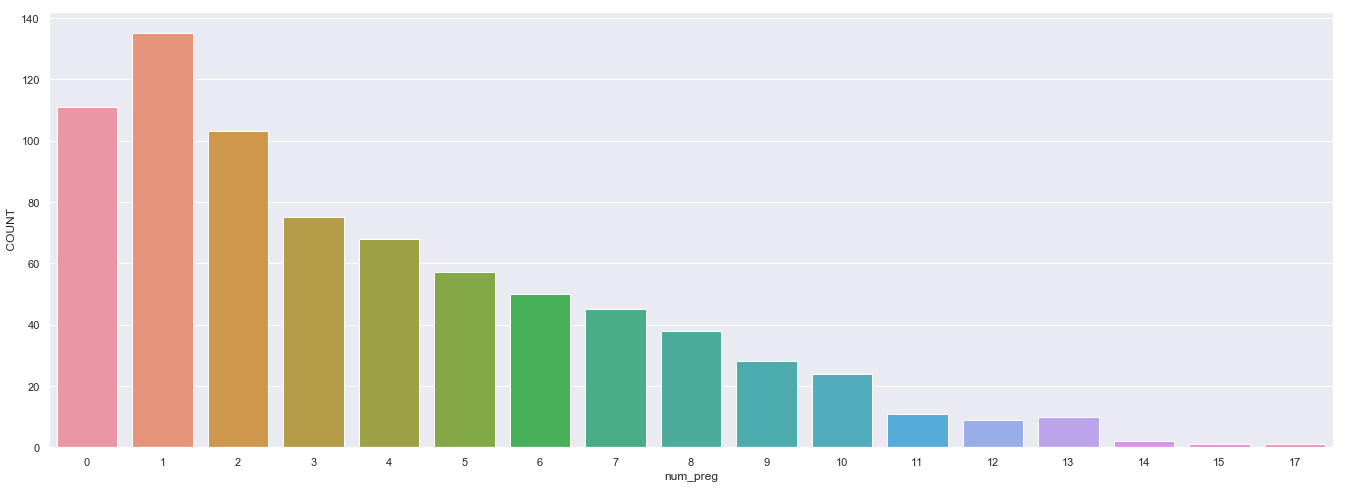

In [34]:
sns.barplot(x= df.num_preg.value_counts().index, y = df.num_preg.value_counts().values)
plt.xlabel('num_preg')
plt.ylabel(" COUNT")
plt.show()

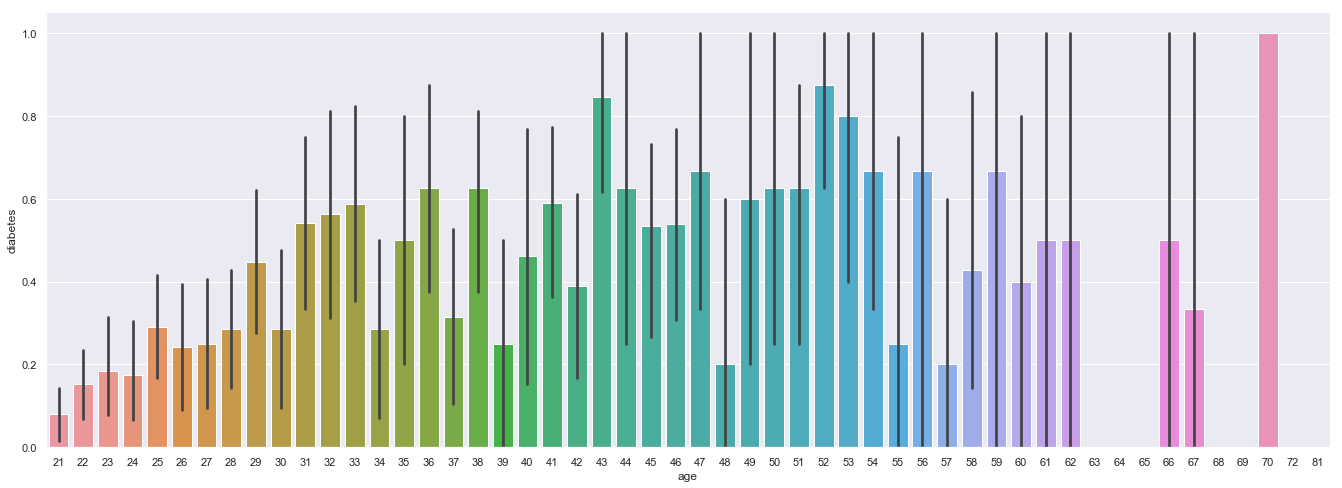

In [35]:
sns.barplot(x='age',y='diabetes',data=df)

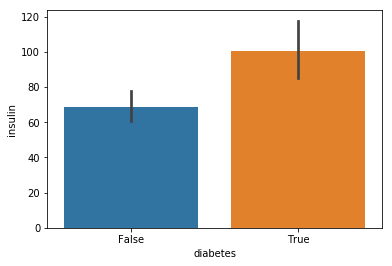

In [25]:
sns.barplot(x='diabetes',y='insulin',data=df)

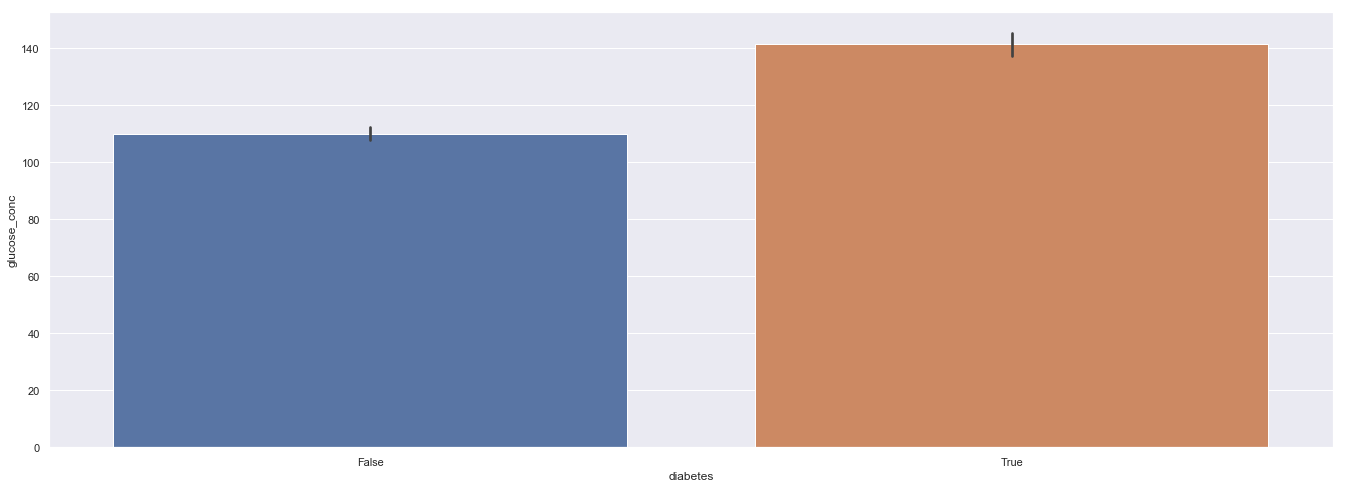

In [42]:
sns.barplot(x='diabetes',y='glucose_conc',data=df)

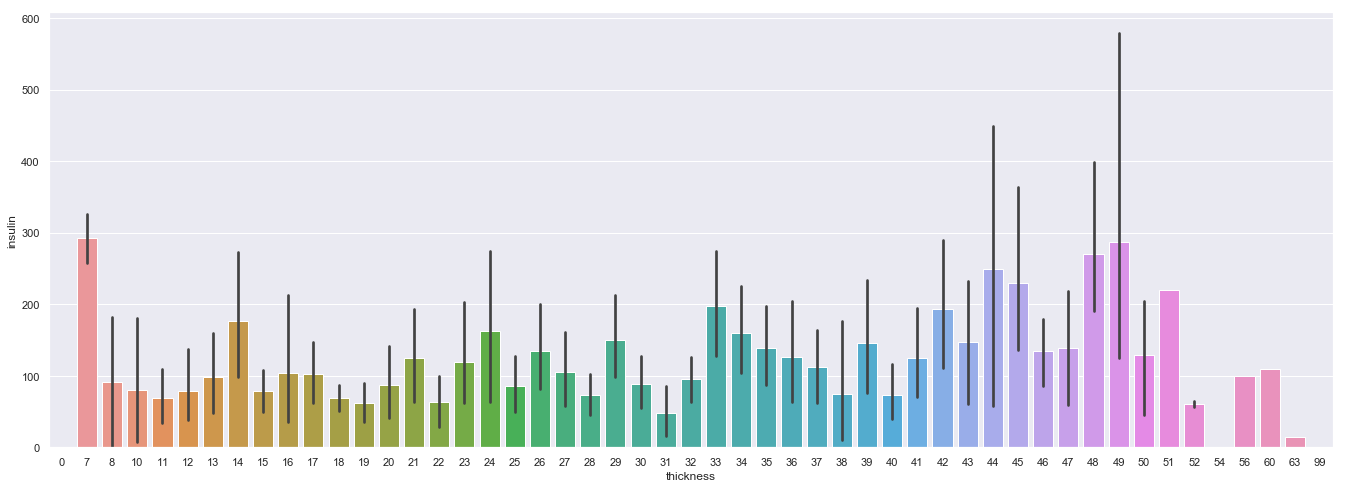

In [58]:
sns.barplot(x='thickness',y='insulin',data=df)

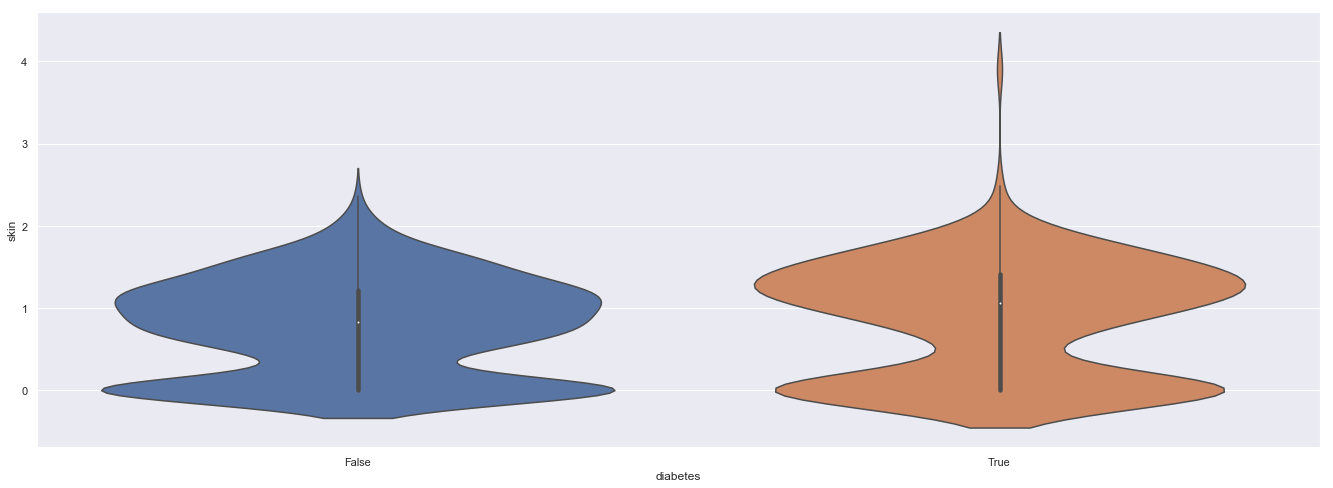

In [52]:
sns.violinplot(x='diabetes',y='skin',data=df)

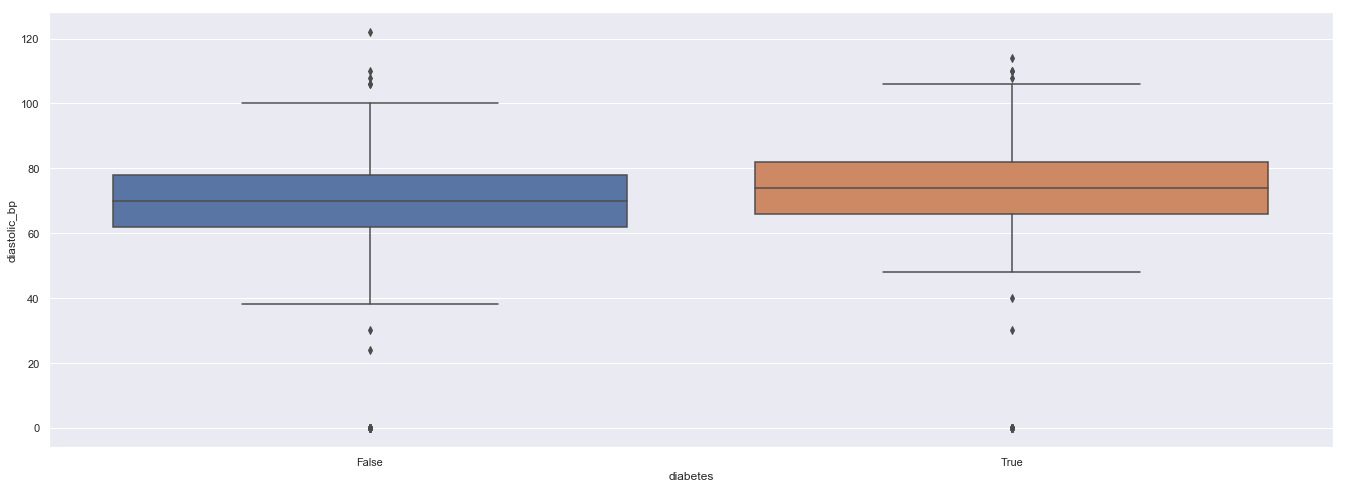

In [51]:
sns.boxplot(x='diabetes',y='diastolic_bp',data=df)

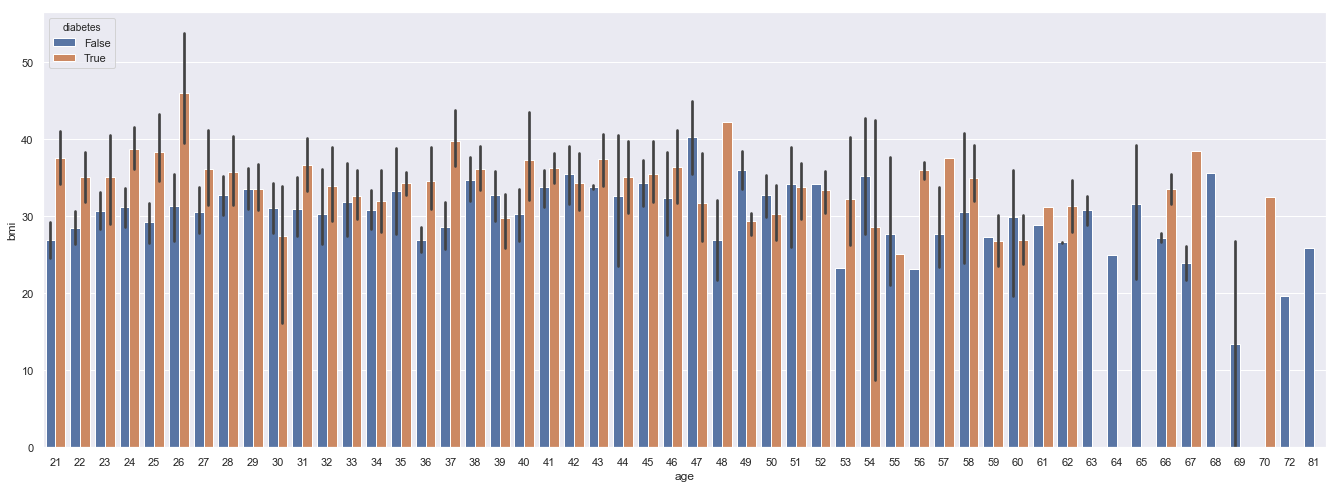

In [61]:
sns.barplot(x='age',y='bmi',hue='diabetes',data=df)

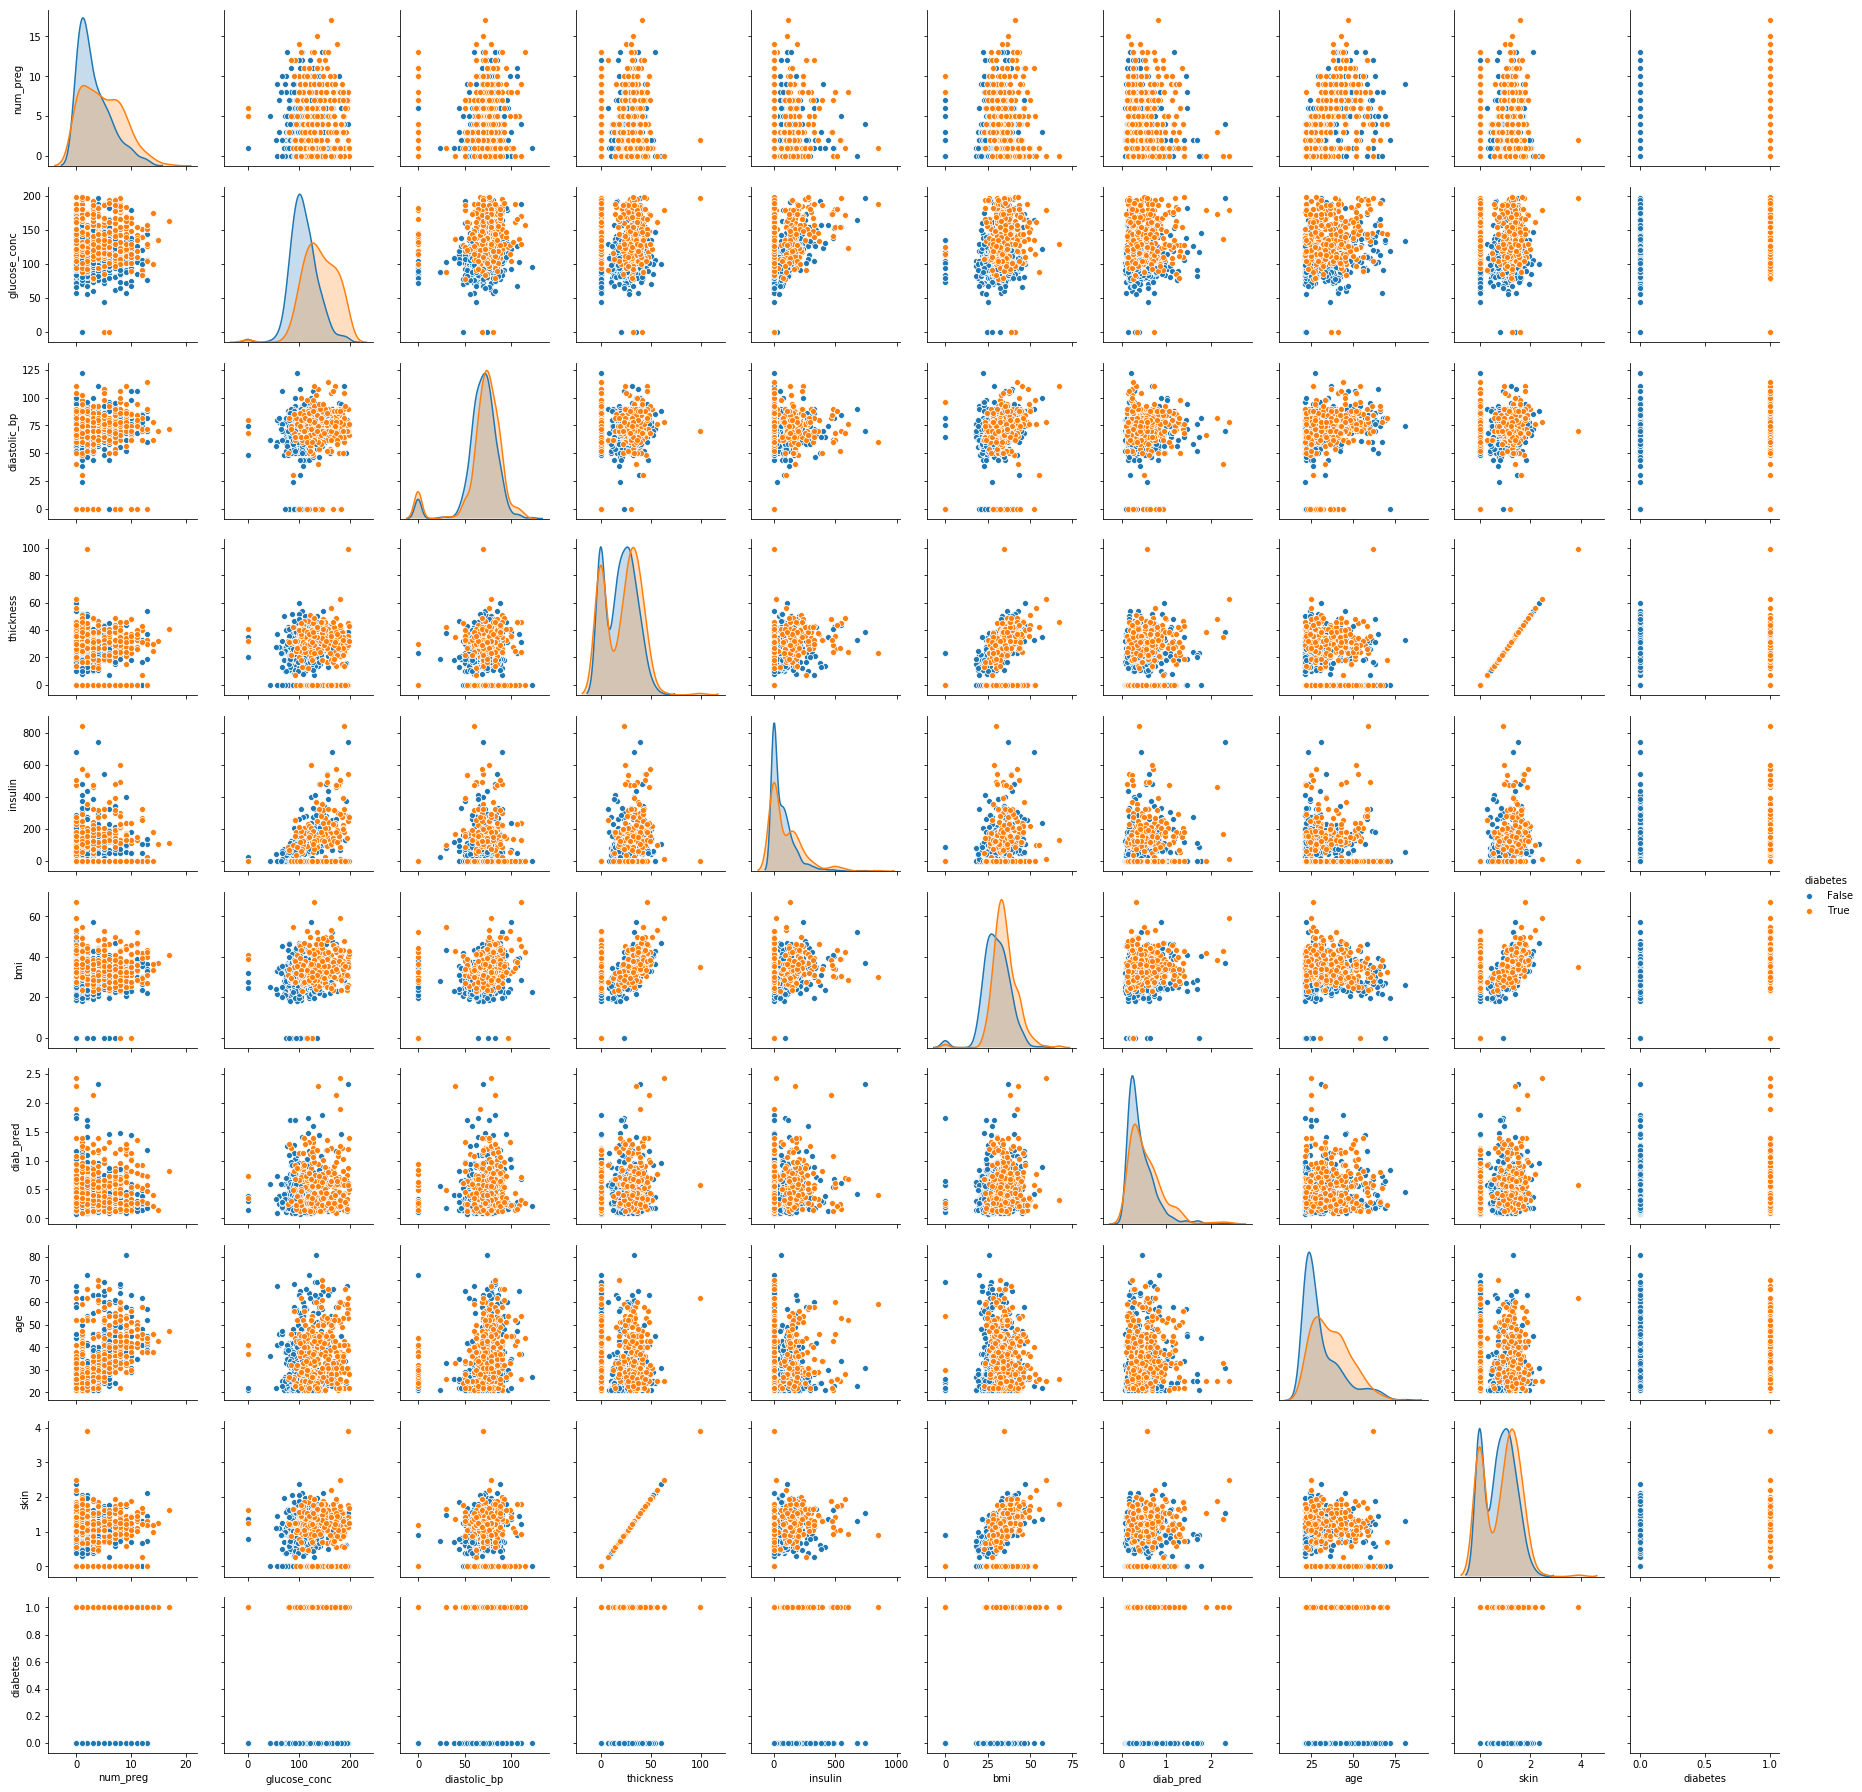

In [9]:
sns.pairplot(df,hue='diabetes')

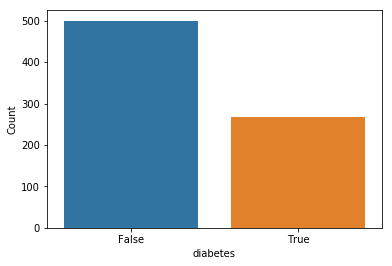

In [10]:
sns.countplot(df.diabetes)
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

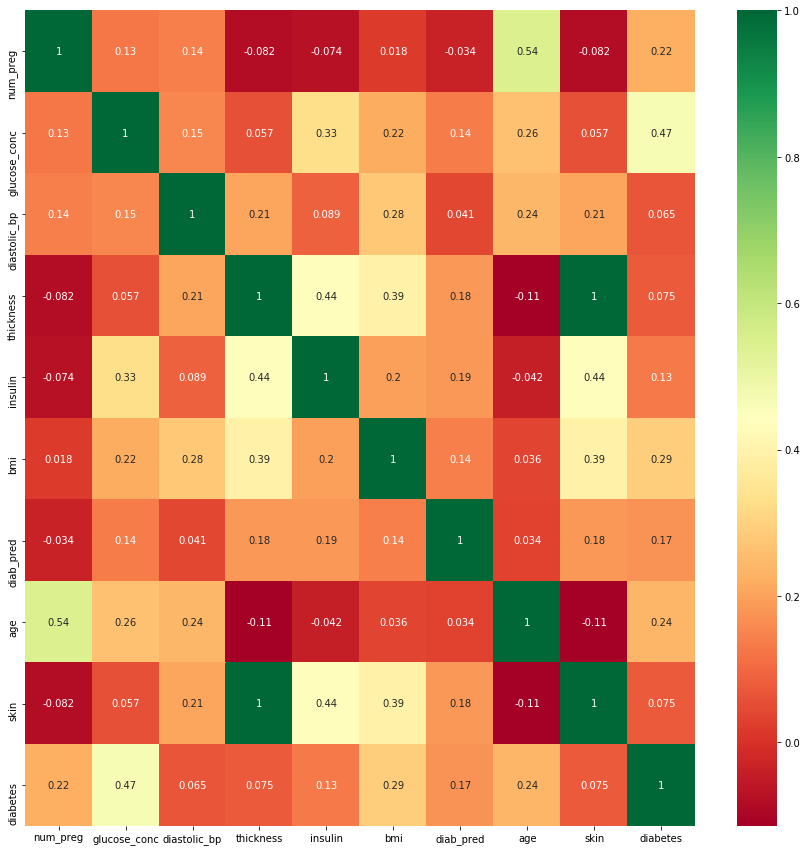

In [11]:
# correalation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (15,15))
g = sns.heatmap(df[top_corr_features].corr(), annot= True, cmap = 'RdYlGn')

In [12]:
n_true= len(df.loc[df['diabetes']== True])
n_false= len(df.loc[df['diabetes']== False])

print('Number of True Cases: {0}({1:2.2f}%)'.format(n_true, (n_true/(n_true+n_false))*100))
print('Number of False Cases: {0}({1:2.2f}%)'.format(n_false, (n_false/(n_true+n_false))*100))

Number of True Cases: 268(34.90%)
Number of False Cases: 500(65.10%)


In [62]:
#Start Building the models.  Skin and thickness are highly correlated so lets drop one of those features.
from sklearn.model_selection import train_test_split

In [105]:
#spliting train and test data
x= df.drop(['diabetes','skin','thickness'], axis= 1)
y= df.diabetes.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [106]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy = 'mean', axis =0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [107]:
# support vector

from sklearn.svm import SVC
svm = SVC(random_state= 1)
svm.fit(X_train, y_train)
print("SVC accuracy: {: .2f}%".format(svm.score(X_test, y_test)*100))

SVC accuracy:  69.48%


In [108]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
print("NB accuracy: {: .2f}%".format(nb.score(X_test, y_test)*100))

NB accuracy:  79.87%


In [109]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("KNN accuracy: {: .2f}%".format(knn.score(X_test, y_test)*100))

KNN accuracy:  69.48%


In [110]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest accuracy: {: .2f}%".format(rf.score(X_test, y_test)*100))

Random Forest accuracy:  83.12%


In [111]:
# XG boost

import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)
print(" XG boost: {: .2f}%".format(xg.score(X_test, y_test)*100))

 XG boost:  81.82%
